In [245]:
#Importing the required libraries
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [246]:
# Loading the dataset
df=pd.read_csv('happiness_score_dataset.csv')

In [247]:
df.shape

(158, 12)

Dataset has 158 rows and 5 columns

In [248]:
df.size

1896

Dataset has 1896 number of elements

In [249]:
 df.ndim
# It returns the number of dimension dataframe have

2

In [250]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [251]:
# Returns the type of data each column have
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

All the columns have numeric or continous value except the Country and Region Column have categorical value

In [252]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

##### Looking at the above observation there is no missing values in dataset.

In [253]:
# Summarize the dataset in statistics format
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


## EDA

### Univariate anaylsis

### Distribution data of happiness score and other six factors

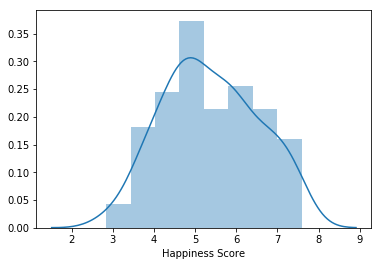

In [254]:
sn.distplot(df['Happiness Score'])

In [255]:
df.count()

Country                          158
Region                           158
Happiness Rank                   158
Happiness Score                  158
Standard Error                   158
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         158
Freedom                          158
Trust (Government Corruption)    158
Generosity                       158
Dystopia Residual                158
dtype: int64

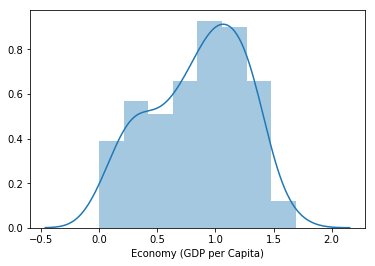

In [256]:
sn.distplot(df['Economy (GDP per Capita)'])

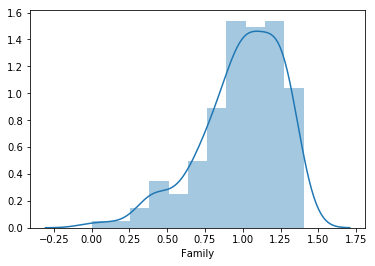

In [257]:
sn.distplot(df['Family'])

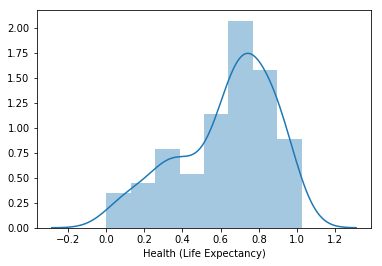

In [258]:
sn.distplot(df['Health (Life Expectancy)'])

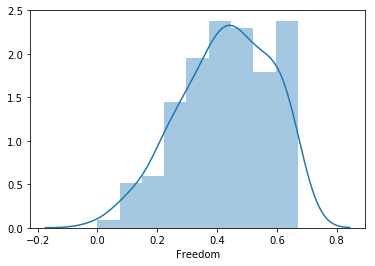

In [260]:
sn.distplot(df['Freedom'])

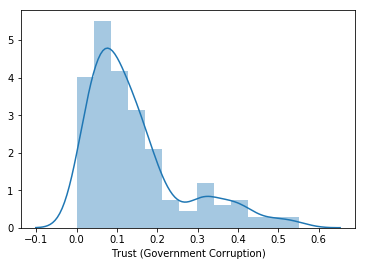

In [261]:
sn.distplot(df['Trust (Government Corruption)'])

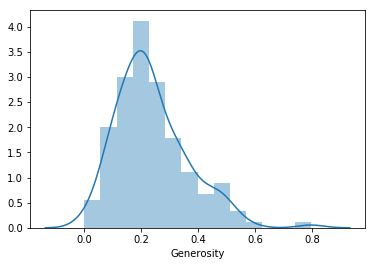

In [262]:
sn.distplot(df['Generosity'])

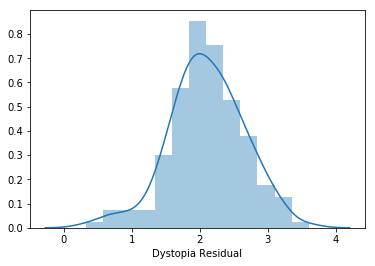

In [263]:
sn.distplot(df['Dystopia Residual'])

In [264]:
Happiness_Factor=['Economy (GDP per Capita)', 'Family', 
                  'Health (Life Expectancy)', 'Freedom', 
                  'Generosity', 'Trust (Government Corruption)', 
                   'Dystopia Residual']

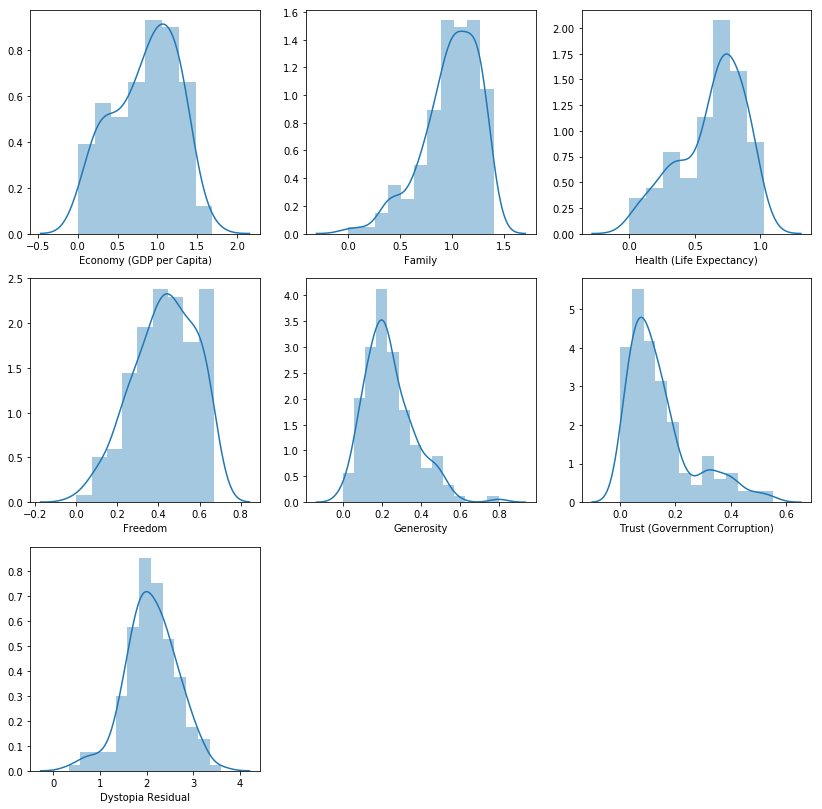

In [265]:
def plot_columns_on_grid(data, columns, grid):
    for i, column in enumerate(columns):
        plt.subplot(grid[0], grid[1], i+1)
        sn.distplot(data[column])

plt.figure(figsize=(14,14))
plot_columns_on_grid(df, Happiness_Factor, (3, 3))

#### 1. The above graphs shows the distribution plot for each of the factors contributing in happiness score of country

#### 2. Dystopia Redidual,Family,Freedom have normal distribution curve having mean approx equal to median.

#### 3. From Generosity distribution graph outlier can be seen
#### 4. Trust,Helath and Economy are somewhat left skewed or right skewed from mean.

## Identifying the outliers

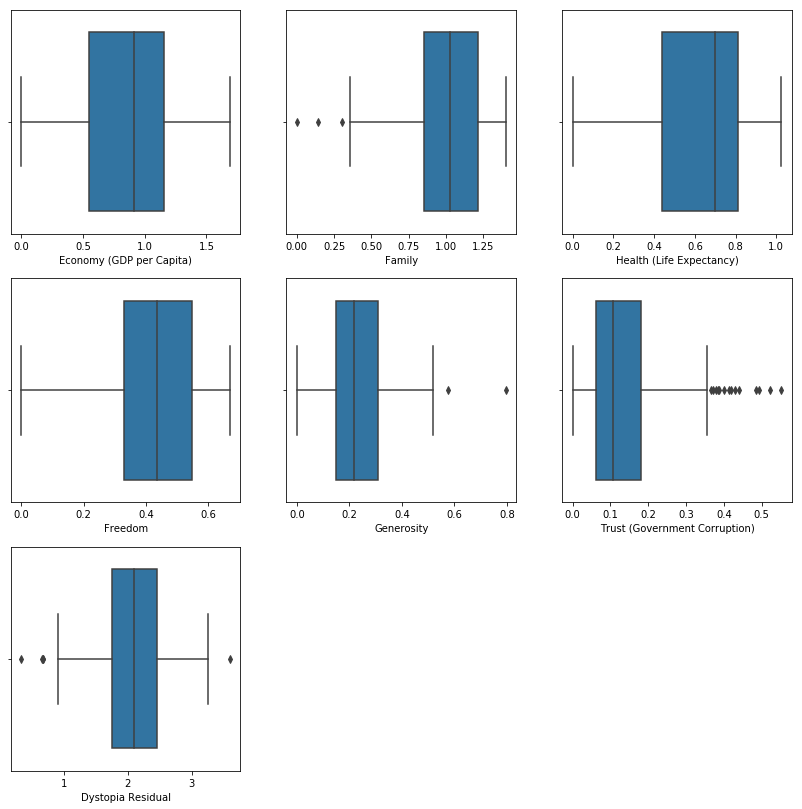

In [266]:
# Plotting the box plot for all the six factors
def plot_columns_on_grid(data, columns, grid):
    for i, column in enumerate(columns):
        plt.subplot(grid[0], grid[1], i+1)
        sn.boxplot(data[column])

plt.figure(figsize=(14,14))
plot_columns_on_grid(df, Happiness_Factor, (3, 3))

#### Outlier can be seen in Trust,Dystopia,Generosity and Family Columns

### Bivariate anaylsis

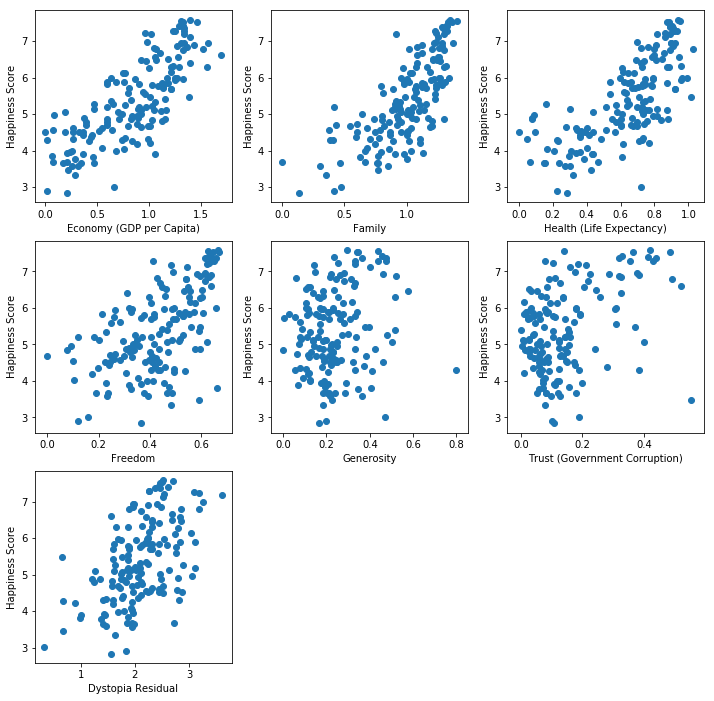

In [267]:
### Plotting the relation between Happiness score and six factors.
def plot_columns_on_grid(data, columns, grid):
    for i, column in enumerate(columns):
        plt.subplot(grid[0], grid[1], i+1)
        plt.scatter(data[column],df['Happiness Score'])
        plt.xlabel(column)
        plt.ylabel('Happiness Score')

plt.figure(figsize=(12,12))
plot_columns_on_grid(df, Happiness_Factor,(3, 3))

#### -Economy and Family are positively correlated with the happiness score can be considered as most important factor.
#### - Freedom and Health have moderate correlation with happiness score.
#### -Generoisity and Trust have least correlation with happiness score.

### Multivariate anaylsis 

In [268]:
cor=df.corr()
cor

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


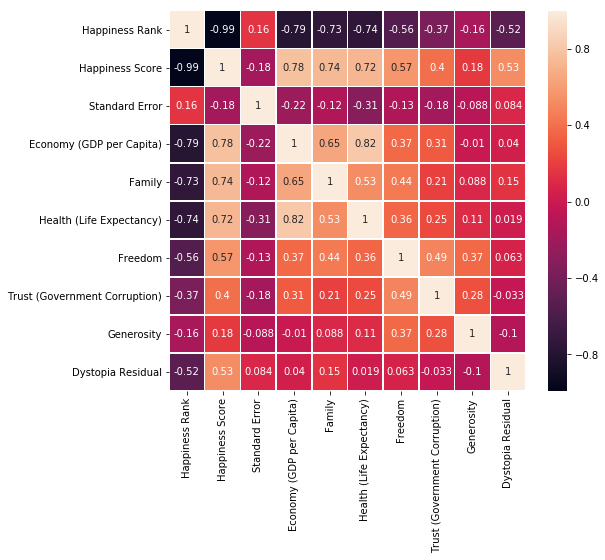

In [269]:
corr_matrix=df.corr()
fig, axis = plt.subplots(figsize=(8, 7))
sn.heatmap(corr_matrix,annot=True,linewidths=.5)

#### Economy and family have strong correlation of 0.78 and .74 with happiness score

#### Generosity have least correlation of 0.18 with happiness score

#### Economy(GDP per capita) have strong relationship with Family(0.65) and Life Expectancy (0.82) we can infer that countries with high gdp have good life expectancy and famiy.

## Outlier Removal

In [270]:
from scipy.stats import zscore
z=np.abs(zscore(df[Happiness_Factor]))
new_df=df[(z<3).all(axis=1)]

In [271]:
new_df.shape

(152, 12)

In [272]:
df.shape

(158, 12)

In [273]:
# Data loss percentage
Data_loss=(158-152)/158*100
Data_loss


3.79746835443038

##  Skewness

In [274]:
# Check for skewness range
new_df[Happiness_Factor].skew()

Economy (GDP per Capita)        -0.401110
Family                          -0.815356
Health (Life Expectancy)        -0.733453
Freedom                         -0.406211
Generosity                       0.646579
Trust (Government Corruption)    1.287270
Dystopia Residual               -0.045578
dtype: float64

In [275]:
new_df.skew()

Happiness Rank                   0.008526
Happiness Score                  0.165587
Standard Error                   2.032851
Economy (GDP per Capita)        -0.401110
Family                          -0.815356
Health (Life Expectancy)        -0.733453
Freedom                         -0.406211
Trust (Government Corruption)    1.287270
Generosity                       0.646579
Dystopia Residual               -0.045578
dtype: float64

In [160]:
# Now we have to apply Log transformation techniques on this four features

#new_df['Family'] =np.log(new_df['Family'])
#new_df['Health (Life Expectancy)'] =np.log(new_df['Health (Life Expectancy)'])
#new_df['Generosity'] =np.log(new_df['Generosity'])
#new_df['Trust (Government Corruption)'] =np.log(new_df['Trust (Government Corruption)'])
#new_df['Health (Life Expectancy)']=np.log(new_df['Health (Life Expectancy)'])
#Applied log trnasformation technique but getting NAN values

In [161]:
#new_df.skew()

In [276]:
# Since we are getting NAN values after applying that's why applying the power transformation technique
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
new_df[Happiness_Factor]=scaler.fit_transform(new_df[Happiness_Factor].values)
# Using 'yeo-johnson' method instead of box-cox because it works only with postive value and not even column having zero value.

In [277]:
new_df[Happiness_Factor].skew()
# Now all feature are in acceptable range

Economy (GDP per Capita)        -0.144167
Family                          -0.149268
Health (Life Expectancy)        -0.184207
Freedom                         -0.077878
Generosity                       0.022444
Trust (Government Corruption)    0.179115
Dystopia Residual                0.014422
dtype: float64

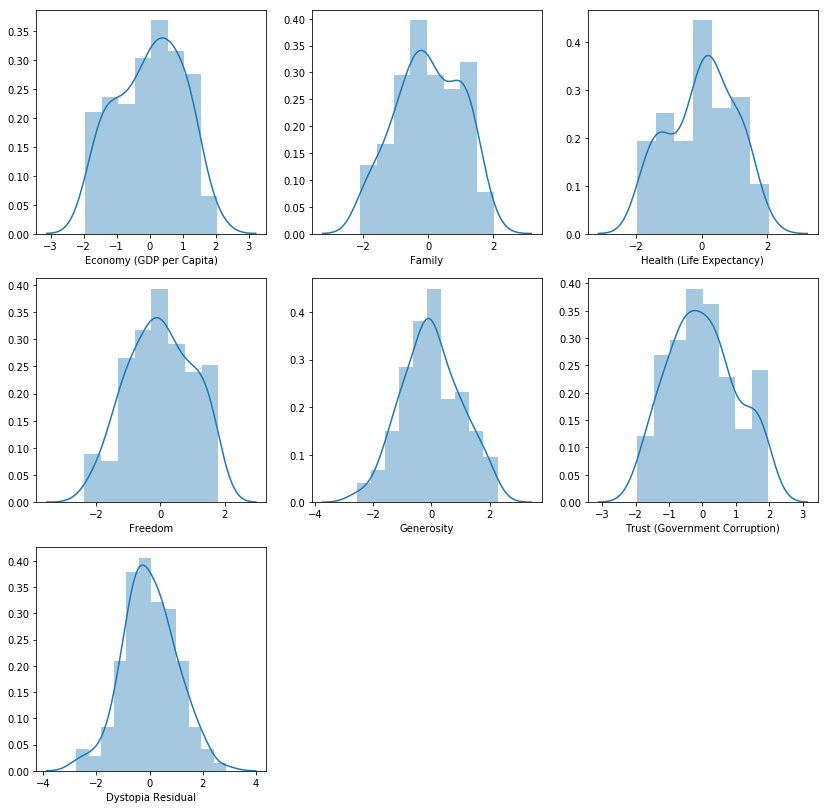

In [278]:
def plot_columns_on_grid(data, columns, grid):
    for i, column in enumerate(columns):
        plt.subplot(grid[0], grid[1], i+1)
        sn.distplot(data[column])

plt.figure(figsize=(14,14))
plot_columns_on_grid(new_df, Happiness_Factor, (3, 3))

### From the above distribution plot we can see that now all the features have normal distribution curve or less skewed distribution so now outlier and skewness both are removed for the happiness factors.

### Splitting and training the data

In [280]:
x=new_df[Happiness_Factor] # Independent variable
y=new_df['Happiness Score'] # Dependet variable or target variable

In [281]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Finding best random state

In [199]:
MaxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu=acc
        maxRS=i
print("Best accuracy is",MaxAccu,'on radom state',maxRS)

Best accuracy is 0.9967455791718408 on radom state 126


In [282]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=126)
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [283]:
regressor.score(x_train,y_train)

0.993048623306592

In [284]:
regressor.score(x_test,y_test)

0.9967455791718408

In [285]:
y_pred=regressor.predict(x_test)

In [286]:
r2_score(y_test,y_pred)

0.9967455791718408

In [287]:
# using random forest regressor
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor(n_estimators=20, random_state=126)
RFR.fit(x_train, y_train)
y_pred = RFR.predict(x_test)

In [288]:
print('R2 Score :', r2_score(y_test, y_pred))

R2 Score : 0.9335164339241833


In [289]:
# using Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
y_pred=DTR.predict(x_test)

In [290]:
print('R2 Score :', r2_score(y_test, y_pred))

R2 Score : 0.8123630049870736


In [291]:
from sklearn.svm import SVR
SR = SVR(kernel = 'rbf')
SR.fit(x, y)
y_pred=SR.predict(x_test)

In [292]:
print('R2 Score :', r2_score(y_test, y_pred))

R2 Score : 0.9945413397771231


### Calculating cross validation score to choose the best model 

In [293]:
from sklearn.model_selection import cross_val_score

In [294]:
# Performing cross validation score to check wheather model is overfitting or underfitting.
print(cross_val_score(regressor,x,y,cv=5).mean())

0.804652457984278


In [295]:
print(cross_val_score(RFR,x,y,cv=5).mean())

-3.239128805290803


In [296]:
print(cross_val_score(SR,x,y,cv=5).mean())

-2.2751528451212564


In [297]:
print(cross_val_score(DTR,x,y,cv=5).mean())

-7.434186499090503


### Apply hyperparameter tuning the best accuracy model

In [298]:
from sklearn.model_selection import GridSearchCV

In [299]:
#Linear Regression
parameters={'fit_intercept':[True,False],
               'normalize':[True,False],
               'copy_X':[True,False],
                'n_jobs':[1,2,3,4,5,6]
           }

In [300]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)

In [301]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False], 'n_jobs': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [302]:
GCV.best_params_
# after tuning the parameter it provides the best parameter values

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [303]:
Final_model=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=False)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=r2_score(y_test,pred)
print("Accuracy of the model is ",acc*100)

Accuracy of the model is  99.67455791718407


## Saving the model

In [304]:
from sklearn.externals import joblib

In [305]:
joblib.dump(Final_model,'Final_Model.pkl')

['Final_Model.pkl']